# Раздел 2. Анализ источников

Загрузим и просмотрим все таблицы.

In [43]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.stats.api as sms
from scipy import stats

In [2]:
data = pd.read_csv('D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Исходные данные\\ABgroup.csv')
data.sort_values('user_id').head(50)

,user_id,group
516029,00036L-1T885I,control
4282472,00036L-1T885I,control
1530349,00036L-1T885I,control
4015064,00036L-1T885I,control
4841272,00036L-1T885I,control
6394715,00036L-1T885I,control
7519969,00036L-1T885I,control
6726847,00036L-1T885I,control
3730092,0004MK-MRBUKF,control
4515252,0004MK-MRBUKF,control


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   group    object
dtypes: object(2)
memory usage: 131.8+ MB


In [10]:
data = pd.read_csv('D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Исходные данные\\Cash.csv')
data.sort_values('user_id').head(50)

,user_id,date,cash
4099102,00036L-1T885I,13.07.2021,850
4102936,00036L-1T885I,12.07.2021,1500
7288533,00036L-1T885I,10.07.2021,700
3638659,00036L-1T885I,11.07.2021,0
1944917,00036L-1T885I,16.07.2021,550
7518370,00036L-1T885I,17.07.2021,2650
6900680,00036L-1T885I,14.07.2021,650
7301691,00036L-1T885I,15.07.2021,700
3719604,0004MK-MRBUKF,15.07.2021,1350
3420800,0004MK-MRBUKF,17.07.2021,800


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   date     object
 2   cash     int64 
dtypes: int64(1), object(2)
memory usage: 197.8+ MB


In [14]:
data = pd.read_csv('D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Исходные данные\\Cheaters.csv')
data.sort_values('user_id').head(50)

,user_id,cheaters
1252809,00036L-1T885I,0
3722504,00036L-1T885I,0
8050836,00036L-1T885I,0
7144435,00036L-1T885I,0
7763404,00036L-1T885I,0
7418240,00036L-1T885I,0
5600738,00036L-1T885I,0
7360158,00036L-1T885I,0
8431545,0004MK-MRBUKF,0
1262083,0004MK-MRBUKF,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   cheaters  int64 
dtypes: int64(1), object(1)
memory usage: 131.8+ MB


In [16]:
data = pd.read_csv('D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Исходные данные\\Money.csv')
data.sort_values('user_id').head(50)

,user_id,date,money
612508,00036L-1T885I,10.07.2021,0.00
1089789,00036L-1T885I,11.07.2021,0.00
8416746,00036L-1T885I,15.07.2021,0.00
7136619,00036L-1T885I,13.07.2021,0.00
1663770,00036L-1T885I,12.07.2021,0.99
6647429,00036L-1T885I,17.07.2021,1.99
4001126,00036L-1T885I,14.07.2021,0.00
831633,00036L-1T885I,16.07.2021,0.99
6458679,0004MK-MRBUKF,13.07.2021,0.99
8075077,0004MK-MRBUKF,16.07.2021,0.00


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   date     object 
 2   money    float64
dtypes: float64(1), object(2)
memory usage: 197.8+ MB


In [5]:
data = pd.read_csv('D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Исходные данные\\Platforms.csv')
data.sort_values('user_id').head(50)

,user_id,platform
1205248,00036L-1T885I,XBox
5053411,00036L-1T885I,XBox
4528844,00036L-1T885I,XBox
2096927,00036L-1T885I,XBox
880380,00036L-1T885I,XBox
2369345,00036L-1T885I,XBox
8261440,00036L-1T885I,XBox
587263,00036L-1T885I,XBox
3345060,0004MK-MRBUKF,PS4
6763055,0004MK-MRBUKF,PS4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   platform  object
dtypes: object(2)
memory usage: 131.8+ MB


Создаем новый датафрейм

In [3]:
path = 'D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Исходные данные\\'
pathnew = 'D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Результат\\'
result = pd.DataFrame(columns = ['user_id'])

for filename in os.listdir(path):
    
    dat = pd.read_csv(path + filename)
        
    if (filename == 'Cash.csv') | (filename == 'Money.csv'):
        dat1 = dat.groupby('date').sum().reset_index()
        dat1['date'] = pd.to_datetime(dat1['date'], format="%d.%m.%Y")
        dat1.to_csv(pathnew + filename, index = False)
        dat = dat.groupby('user_id').sum().reset_index()
        result = result.merge(dat, on = ['user_id'] , how = 'right')
    else:
        dat = dat.drop_duplicates()
        result = result.merge(dat, on = ['user_id'], how = 'right')
        dat.to_csv(pathnew + filename, index = False)
result.head(50)

,user_id,group,cash,cheaters,money,platform
0,NHFL0F-Y90OSH,test,5550,0,6.94,XBox
1,MVPNHS-PBHB8S,control,5900,0,4.96,XBox
2,1UWMRN-8NVCLI,test,7000,0,6.95,PC
3,EHO5II-03X9PU,control,6350,0,4.95,PS4
4,7C5ZAE-D1NCY9,control,6150,0,5.95,XBox
5,IB88S4-OF6I5X,control,5650,0,4.96,XBox
6,QY72E9-WIG65T,test,7700,0,9.93,PC
7,FV7GP9-95XF41,control,8650,0,10.94,PS4
8,K1NGEU-203Y4H,control,5700,0,5.95,PC
9,EJ2I93-0QY36N,test,5050,0,2.98,PS4


# Раздел 3. Очистка данных

Очистим датафрейм от читеров. Рассмотрим данную категорию пользователей.

In [4]:
cheater = result.sort_values('cheaters', ascending = False)
cheater.head(50)

,user_id,group,cash,cheaters,money,platform
236262,OTFS7I-2THQY0,control,149800,1,0.0,PC
174968,ZXPGD5-0WQBUI,control,131700,1,0.0,PC
69603,T3THCX-FPVDJ0,test,154100,1,0.0,PC
21651,Y0IHN3-OD8DO6,control,190800,1,0.0,PC
645976,C7N5F2-ZKGE2K,control,145900,1,0.0,PC
816688,OURYQX-50JQV6,control,106650,1,0.0,PC
902307,M7P19H-I7JU6Y,test,127650,1,0.0,PC
380097,ZQXBU3-QQY4YE,control,151550,1,0.0,PC
883155,2SI8N5-SZHMU3,control,177400,1,0.0,PC
859652,MB070L-UVJFV8,control,125950,1,0.0,PC


In [5]:
cheater = result[(result.cheaters == 1) ]
cheater.money.sum()

0.0

In [6]:
cheater.cash.mean()

146807.93201133143

In [ ]:
Удалим явных читеров из датафрейма и визиализируем результаты по полю 'cash'

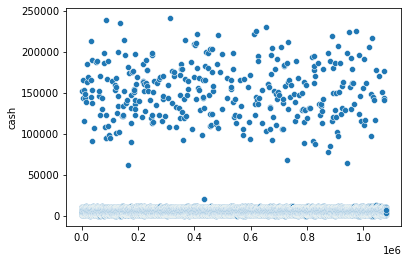

In [7]:
res_without_ch = result[(result.cheaters != 1) ]
sns.scatterplot( data = res_without_ch['cash'])
plt.show()

Удалим оставшихся читеров из датафрейма и сохраним полученный результат

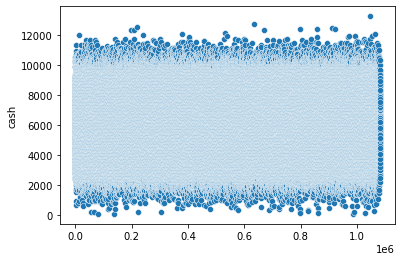

,user_id,group,cash,cheaters,money,platform
0,NHFL0F-Y90OSH,test,5550,0,6.94,XBox
1,MVPNHS-PBHB8S,control,5900,0,4.96,XBox
2,1UWMRN-8NVCLI,test,7000,0,6.95,PC
3,EHO5II-03X9PU,control,6350,0,4.95,PS4
4,7C5ZAE-D1NCY9,control,6150,0,5.95,XBox
...,...,...,...,...,...,...
1079995,16WSYQ-3HAAMX,test,6200,0,5.95,XBox
1079996,24TKVV-NU27F4,test,8900,0,9.94,XBox
1079997,NQ6KMF-17NVXH,control,7700,0,7.95,XBox
1079998,FJ3O9O-BHSV3M,test,4050,0,5.94,PS4


In [8]:
res_clean = res_without_ch[(res_without_ch.cash <= np.percentile(res_without_ch.cash, 99)) | (res_without_ch.money !=0)]
sns.scatterplot( data = res_clean['cash'])
plt.show()
res_clean.to_csv('D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Результат\\General.csv', index = False)   
res_clean

# Раздел 4. Использование статистических методов

Для определения основных метрик напишем функцию

In [10]:
def my_basic_research(df, column):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    sns.distplot(df[column])
    plt.title("Распределение метрики")
    plt.show()
    
    sm.qqplot(df[column], fit = True)
    plt.title("QQ plot")
    plt.show()

Базовые метрики
count    539991.000000
mean       5800.705382
std        1347.086653
min          50.000000
25%        4900.000000
50%        5800.000000
75%        6700.000000
max       12300.000000
Name: cash, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
5700    8234
5850    8176
6050    8060
5750    8033
5600    8021
Name: cash, dtype: int64
------------------------------------
Эксцесс  0.036395474055478605
Ассиметрия  0.044479811298419145


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


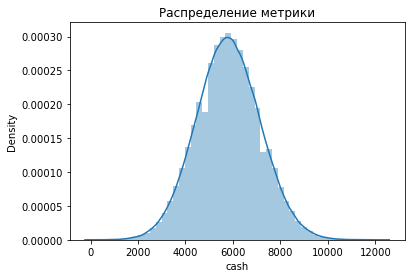

C:\Users\Msi-1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


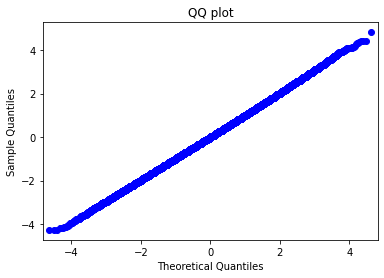

Базовые метрики
count    539991.000000
mean          5.829478
std           1.873622
min           0.000000
25%           4.950000
50%           5.950000
75%           6.950000
max          15.930000
Name: money, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
5.95    55576
4.96    54557
3.96    42771
4.95    37251
6.95    37051
Name: money, dtype: int64
------------------------------------
Эксцесс  0.006912261917506601
Ассиметрия  0.2288898000446629


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


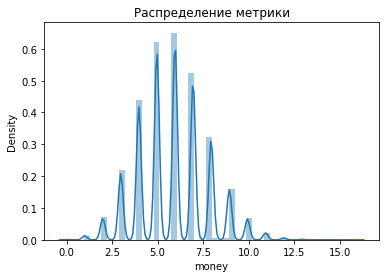

C:\Users\Msi-1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


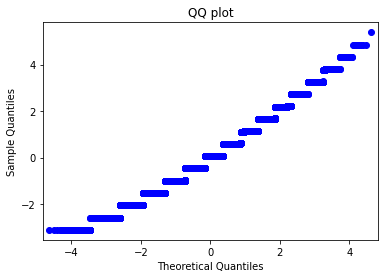

Базовые метрики
count    539312.000000
mean       6229.596319
std        1411.407065
min         100.000000
25%        5300.000000
50%        6250.000000
75%        7200.000000
max       13250.000000
Name: cash, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
6400    7737
6200    7695
6100    7660
6450    7631
6000    7605
Name: cash, dtype: int64
------------------------------------
Эксцесс  0.006093711613085251
Ассиметрия  0.010217085257937355


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


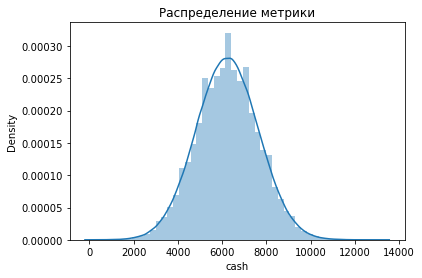

C:\Users\Msi-1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


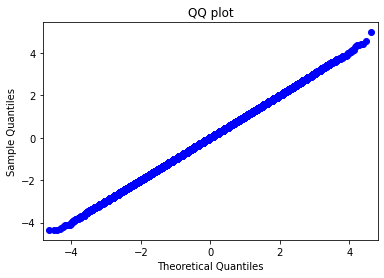

Базовые метрики
count    539312.000000
mean          6.162276
std           1.910851
min           0.000000
25%           4.950000
50%           5.950000
75%           6.960000
max          16.930000
Name: money, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
5.95    55860
4.96    49457
6.95    40198
3.96    36292
6.94    35217
Name: money, dtype: int64
------------------------------------
Эксцесс  0.026747177605954686
Ассиметрия  0.2371702291445552


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


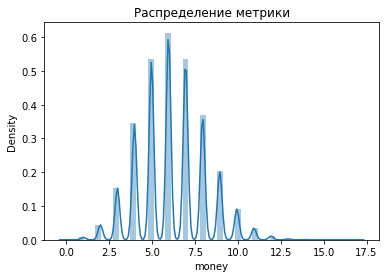

C:\Users\Msi-1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


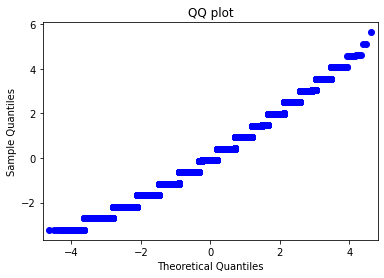

In [12]:
my_basic_research(res_clean[res_clean.group == 'control'], 'cash')
my_basic_research(res_clean[res_clean.group == 'control'], 'money')
my_basic_research(res_clean[res_clean.group == 'test'], 'cash')
my_basic_research(res_clean[res_clean.group == 'test'], 'money')

In [16]:
res_clean.money.unique()

array([ 6.94,  4.96,  6.95,  4.95,  5.95,  9.93, 10.94,  2.98,  9.94,
        7.93,  5.96,  6.96,  8.94,  2.97,  3.96,  9.92,  8.94,  4.97,
        6.97,  9.96,  7.95,  5.94,  4.98,  4.97,  3.97,  7.94,  9.94,
        6.96,  8.95,  5.97,  8.93,  1.98,  7.97,  8.95, 10.96, 12.92,
       10.95,  5.97,  8.96,  5.96,  7.92,  6.93,  3.98,  1.99,  7.96,
        7.94,  3.98,  8.97,  9.95,  8.92, 10.94,  9.95,  0.99,  7.96,
        2.99, 11.93, 10.92, 10.93, 10.95, 11.92,  7.98, 11.94, 12.93,
        9.97,  5.98, 12.94,  3.99,  6.98, 11.94,  0.  , 10.97,  5.99,
        4.99, 13.92, 11.95, 11.95,  8.98, 12.94, 11.96, 13.93,  6.99,
       13.94, 11.96, 12.95, 13.94, 12.95, 15.93, 11.97,  7.99, 14.94,
       14.92,  9.98, 14.93, 12.96, 13.95,  8.99, 14.94, 16.93, 15.92,
       13.96, 13.95, 15.94])

Найдем основные характеристики

In [27]:
ARPU = res_clean.groupby(['group']).mean()
print('Значения показателя ARPU\n', ARPU['money'])

Значения показателя ARPU
 group
control    5.829478
test       6.162276
Name: money, dtype: float64


In [28]:
ARPPU = res_clean[res_clean['money'] > 0].groupby(['group']).mean()
print('Значения показателя ARPPU\n', ARPPU['money'])

Значения показателя ARPPU
 group
control    5.831109
test       6.163144
Name: money, dtype: float64


In [29]:
cash_mean = res_clean.groupby(['group']).mean()
print('Значение средней траты внутриигровой валюты ARPPU\n', cash_mean['cash'])

Значение средней траты внутриигровой валюты ARPPU
 group
control    5800.705382
test       6229.596319
Name: cash, dtype: float64


In [31]:
print('Увеличение прибыли, %:', 
      (ARPU.loc['test', 'money'] - ARPU.loc['control', 'money']) * 100 /  ARPU.loc['control', 'money'])

Увеличение прибыли, %: 5.708870298896402


In [33]:
print('Увеличение трат, %:', 
      (cash_mean.loc['test', 'cash'] - cash_mean.loc['control', 'cash']) * 100 /  cash_mean.loc['control', 'cash'])

Увеличение трат, %: 7.393772112761038


Определим доверительные интервалы

In [34]:
def my_norm_confidence(df, column , alpha):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std()/np.sqrt(len(df[column])))
    return interval

In [48]:
print('Доверительный интервал показателя ARPU контрольной группы:')
my_norm_confidence(res_clean[res_clean.group == 'control'], 'money',0.95)

Доверительный интервал показателя ARPU контрольной группы:


(5.8244809333985605, 5.834475567738912)

In [49]:
print('Доверительный интервал показателя ARPU тестовой группы:')
my_norm_confidence(res_clean[res_clean.group == 'test'], 'money',0.95)

Доверительный интервал показателя ARPU тестовой группы:


(6.157175783625956, 6.167375422370723)

In [50]:
print('Доверительный интервал показателя ARPPU контрольной группы:')
my_norm_confidence(res_clean[(res_clean.group == 'control') & (res_clean.money > 0)], 'money',0.95)

Доверительный интервал показателя ARPPU контрольной группы:


(5.826116885775793, 5.836100771318392)

In [41]:
print('Доверительный интервал показателя ARPU тестовой группы:')
my_norm_confidence(res_clean[(res_clean.group == 'test') & (res_clean.money > 0)], 'money',0.95)

(5.8244809333985605, 5.834475567738912)

In [51]:
print('Доверительный интервал среднеигровых трат контрольной группы:')
my_norm_confidence(res_clean[res_clean.group == 'control'], 'cash',0.95)

Доверительный интервал среднеигровых трат:


(5797.112438830211, 5804.298325423267)

In [53]:
print('Доверительный интервал среднеигровых трат тестовой группы:')
my_norm_confidence(res_clean[res_clean.group == 'test'], 'cash',0.95)

Доверительный интервал среднеигровых трат тестовой группы:


(6225.829451582699, 6233.36318644501)

# Раздел 5. Формирование отчёта 

Построим сравнительную таблицу параметров по группам

In [58]:
res_group = res_clean.groupby(['group', 'platform']).mean()
res_group['cheaters'] = res_clean[res_clean.money > 0].groupby(['group', 'platform']).mean()['money']
res_group.columns = ['in-game spending', 'ARPPU', 'ARPU']
res_group

in-game spending     ARPPU      ARPU
group   platform                                      
control PC             5587.102185  5.648307  5.646201
        PS4            5681.936164  5.739466  5.737647
        XBox           6131.793522  6.104434  6.103521
test    PC             6381.745635  6.269743  6.269046
        PS4            6130.493270  6.085866  6.084883
        XBox           6176.402872  6.133686  6.132766

Подготовим таблицу для power BI для построения графиков по дням.

In [60]:
cash = pd.read_csv(path + 'Cash.csv', parse_dates = ['date'], dayfirst = True)
money  = pd.read_csv(path + 'Money.csv', parse_dates = ['date'], dayfirst = True)
testing = pd.read_csv(path + 'ABgroup.csv').drop_duplicates()
cheat = pd.read_csv(path + 'Cheaters.csv').drop_duplicates()
platforms = pd.read_csv(path + 'Platforms.csv').drop_duplicates()
res = cash.merge(money, on = ['user_id', 'date']).drop_duplicates()
res['cheaters']  = res['user_id'].map(dict(zip(cheat.user_id, cheat.cheaters)))
res['group']  = res['user_id'].map(dict(zip(testing.user_id, testing.group)))
res['platform']  = res['user_id'].map(dict(zip(platforms.user_id, platforms.platform)))
rwch = res[(res.cheaters != 1) ]
rc = rwch[(rwch.cash <= np.percentile(rwch.cash, 99)) | (rwch.money !=0)]
rc.to_csv('D:\\Мои документы\\Аналитик данных\\Итоговый проект\\Результат\\General_for Power BI.csv', index = False)   
rc 

,user_id,date,cash,money,cheaters,group,platform
0,GGLSXL-U5BGGY,2021-07-17,200,0.00,0,control,XBox
1,DPWFFN-NL3VF8,2021-07-16,150,0.99,0,test,PS4
2,PASNNG-GVW4RR,2021-07-11,1100,0.99,0,control,XBox
3,4F0AW7-F40GY9,2021-07-15,1050,0.99,0,control,PC
4,CEY6AF-YTSM4V,2021-07-15,150,0.99,0,control,PS4
...,...,...,...,...,...,...,...
8639995,OWJZJH-CNSFHZ,2021-07-17,3150,2.99,0,control,PC
8639996,A6ZAWD-VD21JU,2021-07-15,200,0.00,0,control,PS4
8639997,L9NUIR-HM22U9,2021-07-15,200,0.00,0,control,PC
8639998,0A5AY6-NB4ZIS,2021-07-15,200,0.99,0,control,XBox
